In [2]:
%load_ext autoreload
%autoreload 2

# Buddingtonite - St Andrews

## Fit WD scans


In [3]:
# Set up to find custom python package
import os
import sys
sys.path.insert(1, ".")
sys.path.insert(1, "..")

In [4]:
from src import readfiles, wdscan, correct_quant, calczaf, helper_funs
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
# ------#### INPUT #### -----------------------------
# Where is the data stored?
raw_data_path = Path('../data/raw/buddingtonite_StA/raw_wd_scans')
# What's the sample name?
sample = 'buddingtonite'
# Option to add peak position markers to plot:
# e.g. pk_pos_markers = False (no markers)
#      pk_pos_markers = [145.839] (one marker)
#      pk_pos_markers = [145.84, 145.73] (two markers)
pk_pos_markers =  [146.6] #
# ---------------------------------------------------

Figure not saved
Figure not saved
Figure not saved
Figure not saved


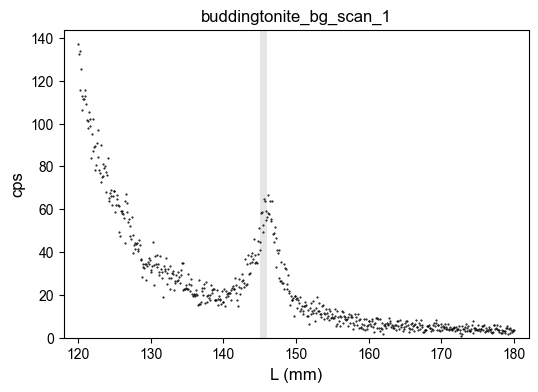

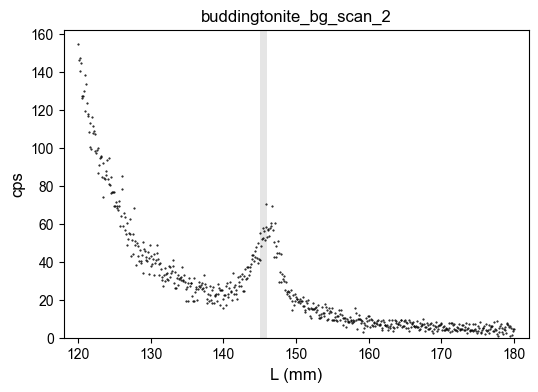

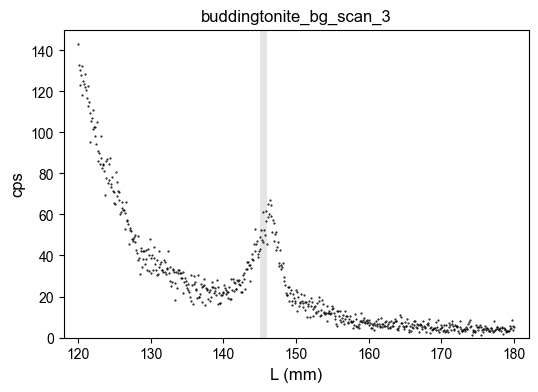

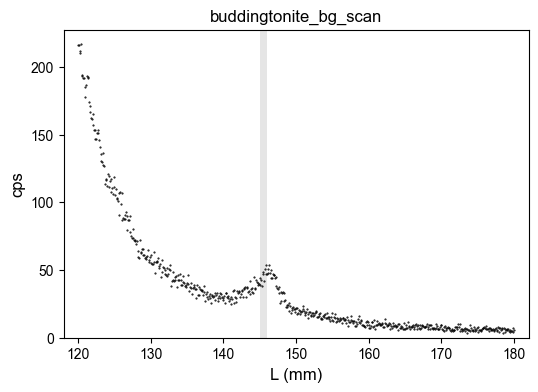

In [6]:
scans = sorted(f for f in raw_data_path.glob('*') if f.stem[0] != '.') #Find all folders except hidden ones

data = [None]*len(scans)
comments = [None]*len(scans)
fig = [None]*len(scans)

for i, subfolder in enumerate(scans):

    comments[i], data[i] = readfiles.import_jeol_wdscans(subfolder,
                                                         scan_filename='data001_mm.csv',
                                                         cnd_filename='data001.cnd',
                                                         comment_line_num=80,
                                                         sep=',')

    fig, ax = wdscan.plot_wdscan(comments[i], data[i], cps_per_nA=False, save_to=None)

plt.show()

In [8]:
#%% Fit all datasets together

# Select regions of the spectrum to use in the fit
fit_regions = [[120, 135], [155, 180]]

# Perform the fit
result, trimmed_data = wdscan.fit_scans_together(
                                    data, fit_regions,
                                    Path('../data/interim/buddingtonite_StA/fits/'),
                                    max_c='default')

Performing the fit...
Saved fit parameters to ..\data\interim\buddingtonite_StA\fits


Saved figure showing fit to buddingtonite_bg_scan_1 in folder "..\data\interim\buddingtonite_ANU\fits"
Saved figure showing fit to buddingtonite_bg_scan_2 in folder "..\data\interim\buddingtonite_ANU\fits"
Saved figure showing fit to buddingtonite_bg_scan_3 in folder "..\data\interim\buddingtonite_ANU\fits"
Saved figure showing fit to buddingtonite_bg_scan in folder "..\data\interim\buddingtonite_ANU\fits"


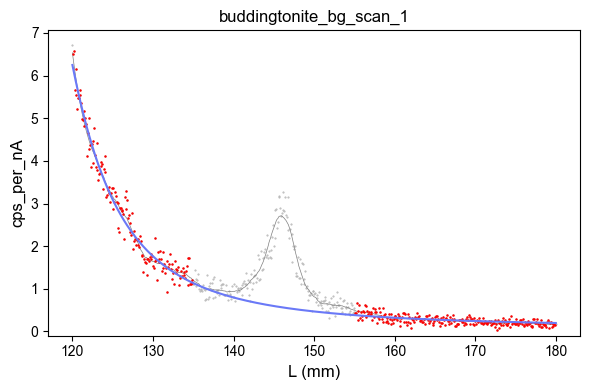

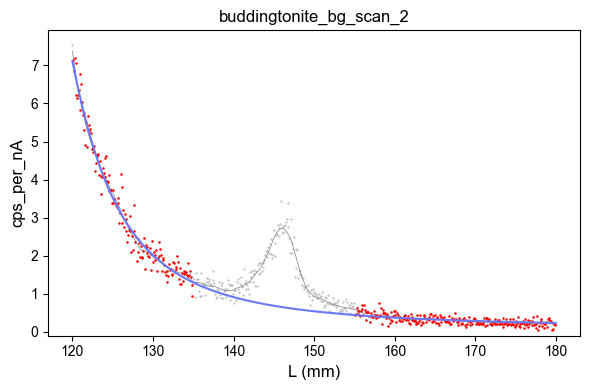

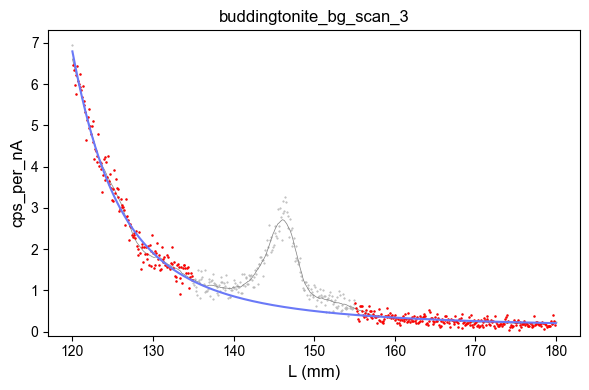

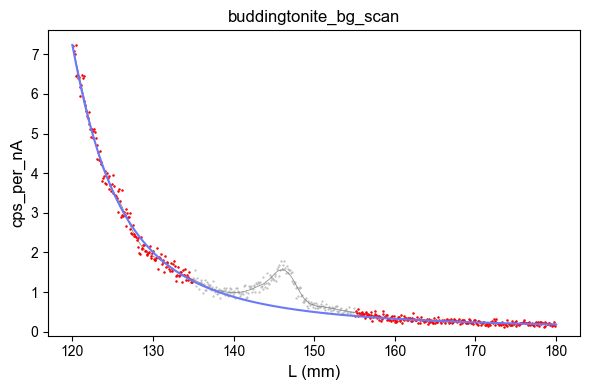

In [10]:
wdscan.plot_fits_together(data, trimmed_data, result, comments,
                          path_out=Path('../data/interim/buddingtonite_ANU/fits/'))

## Correct quantitative analysis

In [21]:
samples = ['buddingtonite'] # List of samples in this dataset
sample_folders = [
    Path('../data/raw/buddingtonite_StA/raw_quant/buddingtonite_146,6')] # List of folders corresponding to the samples
category = 'buddingtonite' # Category of this dataset (e.g. "glasses")

wd_scan = Path('../data/interim/buddingtonite_StA/fits/key_params.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('../data/_dictionaries/standards.csv')

In [26]:
datalist = readfiles.find_files_and_folders(
                samples, sample_folders,
                apf_file=None,
                # apf_file=Path('../data/_dictionaries/apf_values.csv'), #<- Can put None in here
                wd_scan=wd_scan)

datalist

Comments found: ['budd_10nA_30s_03um_146.6mm_BNcalibr_01', 'budd_10nA_30s_03um_146.6mm_BNcalibr_02', 'budd_10nA_30s_03um_146.6mm_BNcalibr_03', 'budd_10nA_30s_03um_146.6mm_BNcalibr_04', 'budd_10nA_30s_03um_146.6mm_BNcalibr_05', 'budd_10nA_30s_03um_146.6mm_BNcalibr_06']


,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\buddingtonite_StA\raw_quant\buddin...,budd_10nA_30s_03um_146.6mm_BNcalibr_01,buddingtonite,..\data\interim\buddingtonite_StA\fits\key_par...,1,0.0
1,..\data\raw\buddingtonite_StA\raw_quant\buddin...,budd_10nA_30s_03um_146.6mm_BNcalibr_02,buddingtonite,..\data\interim\buddingtonite_StA\fits\key_par...,1,0.0
2,..\data\raw\buddingtonite_StA\raw_quant\buddin...,budd_10nA_30s_03um_146.6mm_BNcalibr_03,buddingtonite,..\data\interim\buddingtonite_StA\fits\key_par...,1,0.0
3,..\data\raw\buddingtonite_StA\raw_quant\buddin...,budd_10nA_30s_03um_146.6mm_BNcalibr_04,buddingtonite,..\data\interim\buddingtonite_StA\fits\key_par...,1,0.0
4,..\data\raw\buddingtonite_StA\raw_quant\buddin...,budd_10nA_30s_03um_146.6mm_BNcalibr_05,buddingtonite,..\data\interim\buddingtonite_StA\fits\key_par...,1,0.0
5,..\data\raw\buddingtonite_StA\raw_quant\buddin...,budd_10nA_30s_03um_146.6mm_BNcalibr_06,buddingtonite,..\data\interim\buddingtonite_StA\fits\key_par...,1,0.0


In [27]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\buddingtonite_StA\fits\key_params.txt
{'sigma': 6.538361140770055, 'center': 113.24231069786909}
Read dataset: 1 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_01

 loading path: ..\data\interim\buddingtonite_StA\fits\key_params.txt
{'sigma': 6.538361140770055, 'center': 113.24231069786909}
Read dataset: 2 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_02

 loading path: ..\data\interim\buddingtonite_StA\fits\key_params.txt
{'sigma': 6.538361140770055, 'center': 113.24231069786909}
Read dataset: 3 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_03

 loading path: ..\data\interim\buddingtonite_StA\fits\key_params.txt
{'sigma': 6.538361140770055, 'center': 113.24231069786909}
Read dataset: 4 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_04

 loading path: ..\data\interim\buddingtonite_StA\fits\key_params.txt
{'sigma': 6.538361140770055, 'center': 113.24231069786909}
Read dataset: 5 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_05

 loading path: ..\data\interim\buddingtonite

In [29]:
correct_quant.process_datasets(
    myspot, 
    datalist, 
    num_mc_sims=100, 
    path_out=Path("../data/processed/buddingtonite_StA/background_corrections/"))


Processing dataset: 1 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_01
Correcting background
Saved bg correction figure for 2021-12-01_budd_10nA_30s_03um_146-6mm_BNcalibr_01
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-01_budd_10nA_30s_03um_146.6mm_BNcalibr_01
correct height/area ratio
original kraw: 6.41 ± 4.00%
corrected kraw: 7.18 ± 3.31%

Processing dataset: 2 of 6 : budd_10nA_30s_03um_146.6mm_BNcalibr_02
Correcting background
Saved bg correction figure for 2021-12-01_budd_10nA_30s_03um_146-6mm_BNcalibr_02
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-01_budd_10nA_30s_03um_146.6mm_BNcalibr_02
correct height/area ratio
original kraw: 6.65 ± 3.89%
corrected kraw: 7.46 ± 3.10%

Processing dataset: 3 of 6 : budd_10nA_30s_03um_146.6mm_BNcalib

In [31]:
summary_tables = correct_quant.write_summary_excel_tables(myspot, "../data/processed/buddingtonite_StA/kraw_summaries.xlsx")

In [32]:
# Write the spot objects out to a pickle file:
with open('../data/interim/buddingtonite_StA/buddingtonite.pickle', 'wb') as handle:
    pickle.dump(myspot, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Write a spots summary table as an excel file:
info_spots = []
for spot in myspot:
    info_spots.append(spot.info)

info = pd.DataFrame(info_spots)
info.to_csv('spots_info_' + category + '.csv')

print('-----Finished-----')

-----Finished-----


## Write calczaf file

In [47]:
myspot[0].standard

,element,xray,crystal,pos,nA,net_cps,lwr_cps,upr_cps,standard,stdev_net_cps
0,Al,Ka,TAP,90.644,10.03,1130.4,24.0,13.4,Orthoclase,0.43
1,Si,Ka,PETL,228.028,10.03,707.9,1.1,0.9,Orthoclase,0.53
2,N,Ka,LDE1L,146.996,10.03,471.3,18.6,15.1,BN,0.39
3,N,Ka,LDE1L,146.996,10.03,471.3,18.6,15.1,BN,0.39


In [42]:
myspot[0].info

folder          ..\data\raw\buddingtonite_StA\raw_quant\buddin...
comment                    budd_10nA_30s_03um_146.6mm_BNcalibr_01
sample                                              buddingtonite
paramfile       ..\data\interim\buddingtonite_StA\fits\key_par...
apf                                                             1
apf_sd                                                        0.0
nA                                                          10.47
date                                                   2021-12-01
spot_size_um                                                  3.0
Name: 0, dtype: object

In [36]:
# Load data from the saved pickle file ---------------------------
saved_pickle_file = "../data/interim/buddingtonite_StA/buddingtonite.pickle"
samples = ['buddingtonite']
category = 'buddingtonite'
subfolder = Path('../data/processed/buddingtonite_StA/calczaf_files/')

write_detection_limit_calczaf_files = True
detlim_subfolder = Path('../data/processed/buddingtonite_StA/calczaf_files/detlim/')

# note: in the subfolder there must be a file specifying valence.
# this can be copied from the _dictionaries folder.
valence_dict = readfiles.read_valence_file(subfolder, pattern='valence*')
standard_database_dict = pd.read_csv(
    '../data/_dictionaries/standards.csv',
     index_col=0, 
     header=None, 
     squeeze=True).to_dict()

standard_database_dict

{'Sanidine': 3000,
 'Diopside': 3001,
 '08_Pollucite': 3002,
 'Albite': 3003,
 'GaN': 608,
 '22_Mo': 542,
 '09_Vanadium_Wire_Alfa': 523}

In [37]:
# Read in the data -------------------------------------------------------------
with open(saved_pickle_file, 'rb') as handle:
    myspot = pickle.load(handle)

print('Loaded data: ', [spot.info.comment for i, spot in enumerate(myspot)])

# Separate the myspot list by sample
sampledata = [None]*len(samples)
for i, sample in enumerate(samples):
    sampledata[i] = [spot for i, spot in enumerate(myspot) if sample == spot.info['sample']]

sampledata = dict(zip(samples,sampledata))

Loaded data:  ['budd_10nA_30s_03um_146.6mm_BNcalibr_01', 'budd_10nA_30s_03um_146.6mm_BNcalibr_02', 'budd_10nA_30s_03um_146.6mm_BNcalibr_03', 'budd_10nA_30s_03um_146.6mm_BNcalibr_04', 'budd_10nA_30s_03um_146.6mm_BNcalibr_05', 'budd_10nA_30s_03um_146.6mm_BNcalibr_06']


In [38]:
# For multiple different methods of processing the data, add a description
run_descriptor = ['']  
# Leave as a list of an empty string if not using: e.g. run_descriptor = ['']

for i in range(len(samples)):

    # Here we pass in these arguments as a dictionary - this is useful in order
    # to reuse the arguments for the detection limit function. But you can
    # alternatively pass in each argument just by defining it in the function
    # as normal (see glasses example).

    args = {
              'elementByDifference' : None # string element symbol
            , 'elementByStoichToStoichOxygen' : None # string element symbol
            , 'stoichOxygenRatio' : 0
            # for buddingtonite there is H
            # that can be defined stoichiometrically relative to N:
            , 'elementByStoichToOtherElement' : 'h'
            , 'OtherElement' : 'n'
            , 'stoichElementRatio' : 4

            , 'correct_bg' : True
            , 'correct_apf' : False

            # Elements to omit from matrix correction
            # (e.g. if analysed but not actually present in sample)
            , 'remove_elements' : ['Rb','Mo','Ca','Mg']

            , 'definedElements' : None # list of element symbols to add
            , 'definedElementWts' : None # list of known element wt% to add
            }

    for j in range(len(run_descriptor)):

        calczaf_path_out = subfolder / '{}{}.dat'.format(
                                            samples[i], run_descriptor[j])
        open(calczaf_path_out, 'w').close()  # Erase contents of file

        if write_detection_limit_calczaf_files:
            
            helper_funs.make_folder_if_it_does_not_exist(detlim_subfolder)

            detlim_path_out = detlim_subfolder / '{}{}_detlim.dat'.format(
                                            samples[i], run_descriptor[j])
            open(detlim_path_out, 'w').close()  # Erase contents of file

        for spot in sampledata[samples[i]]:

            calczaf.write_calczaf_input(
                spot, calczaf_path_out, valence_dict, standard_database_dict,
                accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                **args) # <- **args unpacks the args dictionary defined earlier
                # so that all those arguments are passed into the function
                # without the need to type them all out.

            if not args['correct_bg']:
                msg = ('\n\nCalculating detection limit does not make sense'
                    ' except on background-corrected data. Raw data files' 
                    ' contain an estimate of detection limit without bg'
                    ' correction. To resolve this error, either set'
                    ' write_detection_limit_calczaf_files = False, or'
                    ' set correct_bg to True.\n')

                raise Exception(msg)

            detlim_spot = correct_quant.create_detection_limit_spot(spot)

            calczaf.write_calczaf_input(
                detlim_spot, detlim_path_out, valence_dict, 
                standard_database_dict,
                accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                **args)



KeyError: 'Orthoclase'

Okay, so I need to find the values for the standards used at StA. Orthoclase.

Right, but accorinng to my lab book none of these analyses were any good because of problems with the Si and Al values.